# Objective : This data set consists of the physical parameters of three species of flower — Versicolor, Setosa and Virginica. The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length. In this data we will be predicting the classes of the flowers based on these parameters.The data consists of continuous numeric values which describe the dimensions of the respective features. We will be training the model based on these features.

## Dataset - https://www.kaggle.com/datasets/vijayaadithyanvg/iris-dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('IRIS.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

/home/kranthi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


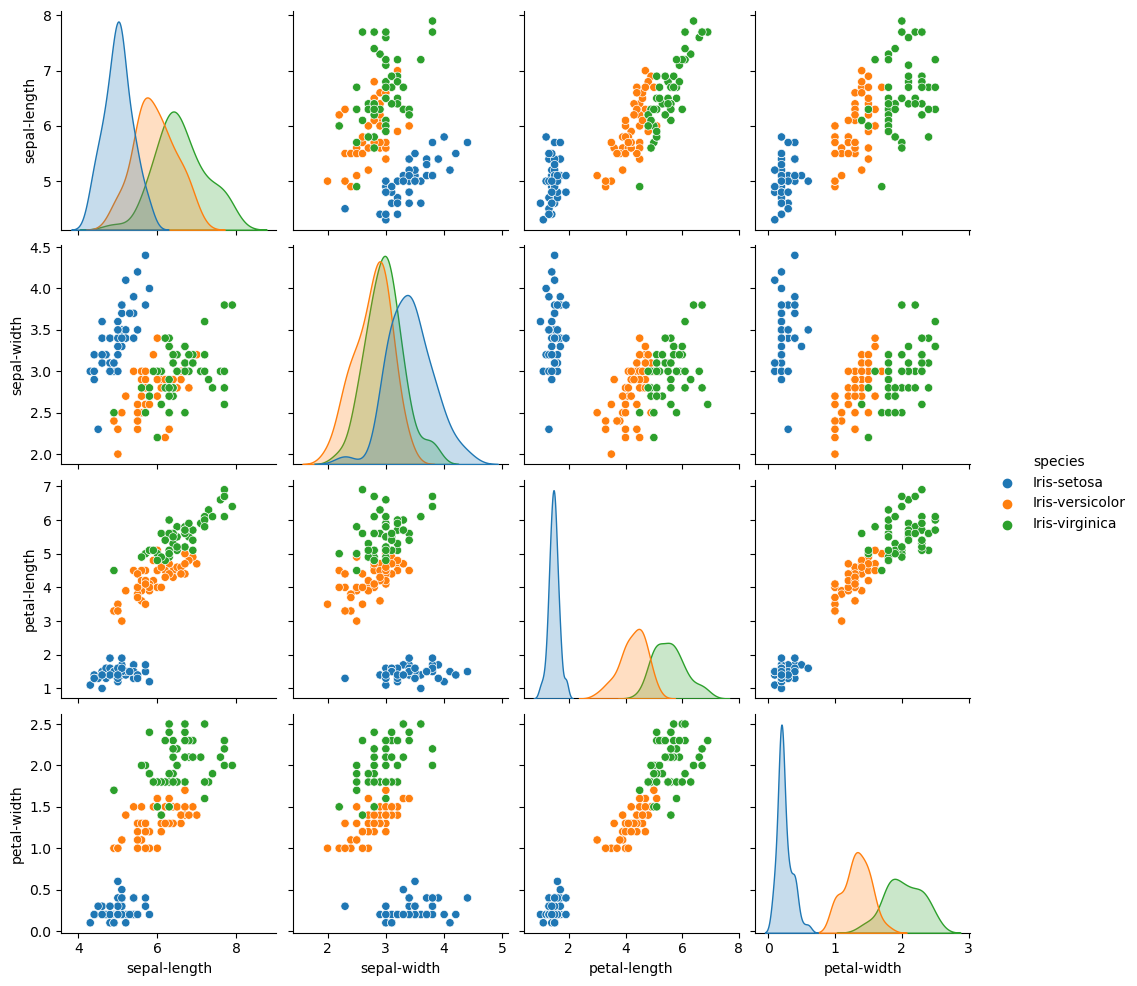

In [5]:
sns.pairplot(df, hue='species')

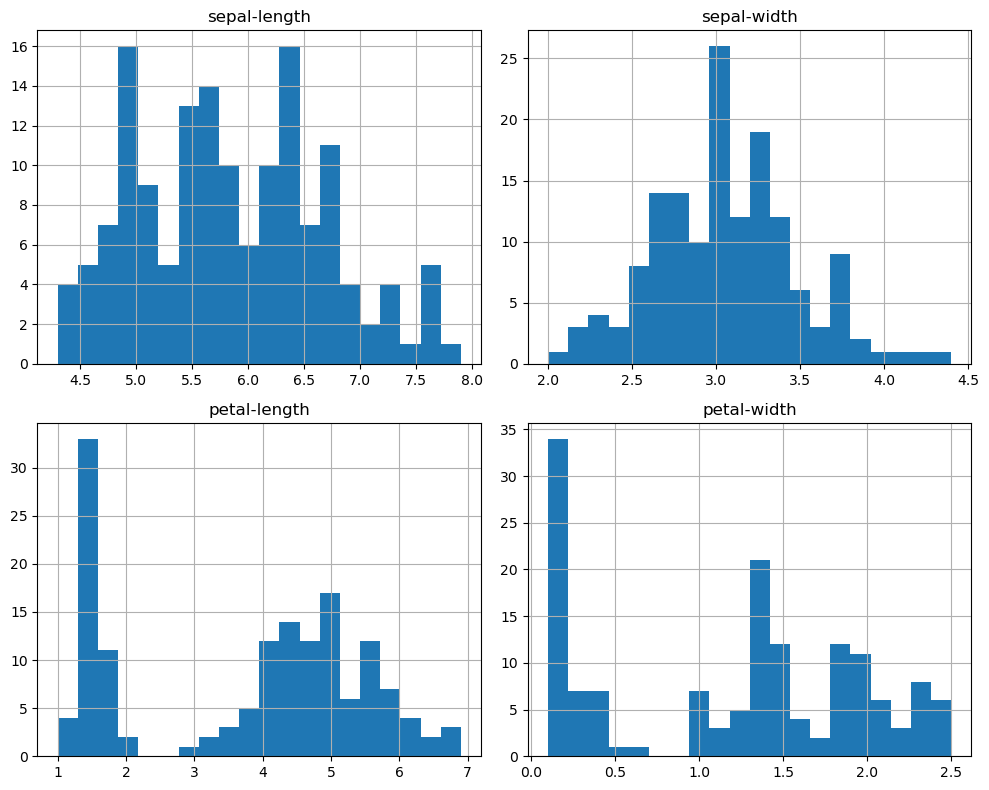

In [6]:
df.hist(figsize=(10,8), bins=20)
plt.tight_layout()
plt.show()

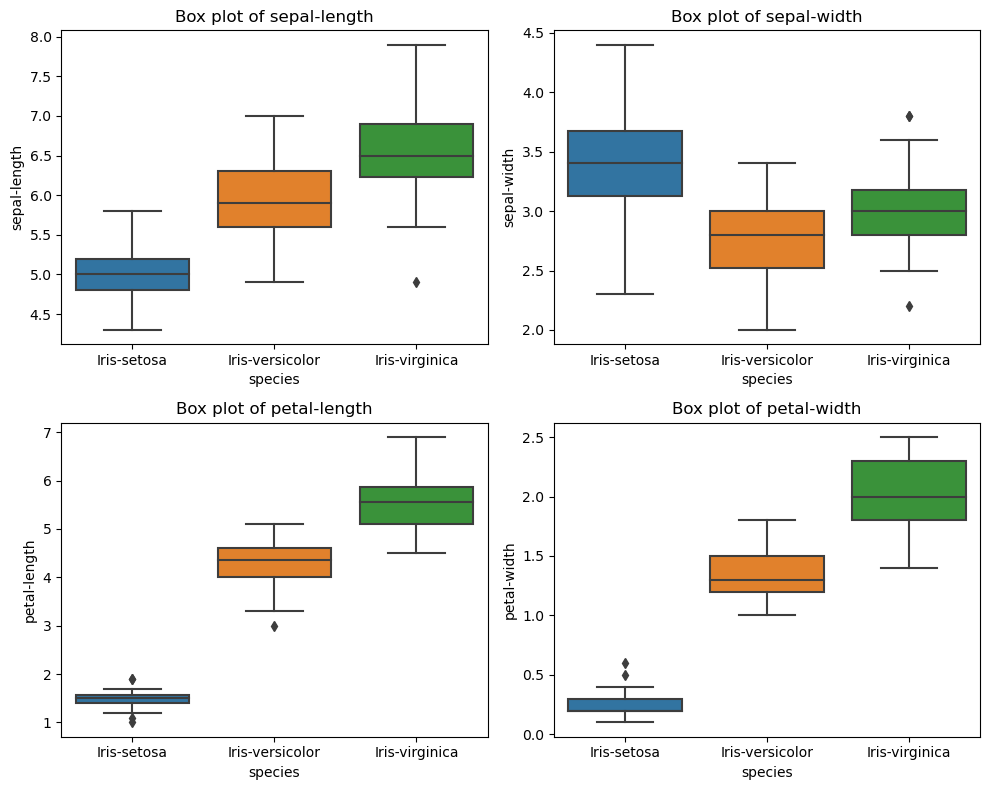

In [7]:
# Box plots
plt.figure(figsize=(10, 8))

for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=column, data=df)
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

In [8]:
numerical = [var for var in df.columns if df[var].dtype != 'O']
numerical

['sepal-length', 'sepal-width', 'petal-length', 'petal-width']

<Axes: >

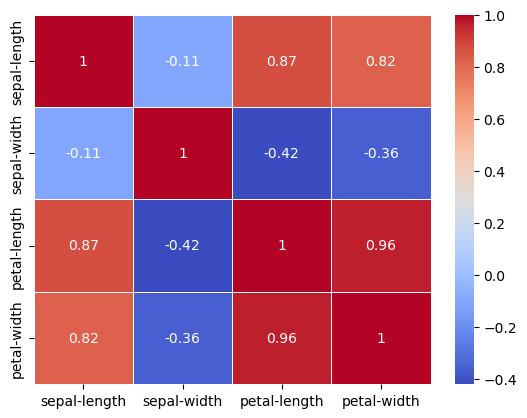

In [9]:
sns.heatmap(df[numerical].corr(), annot=True, cmap='coolwarm', linewidths=0.5)

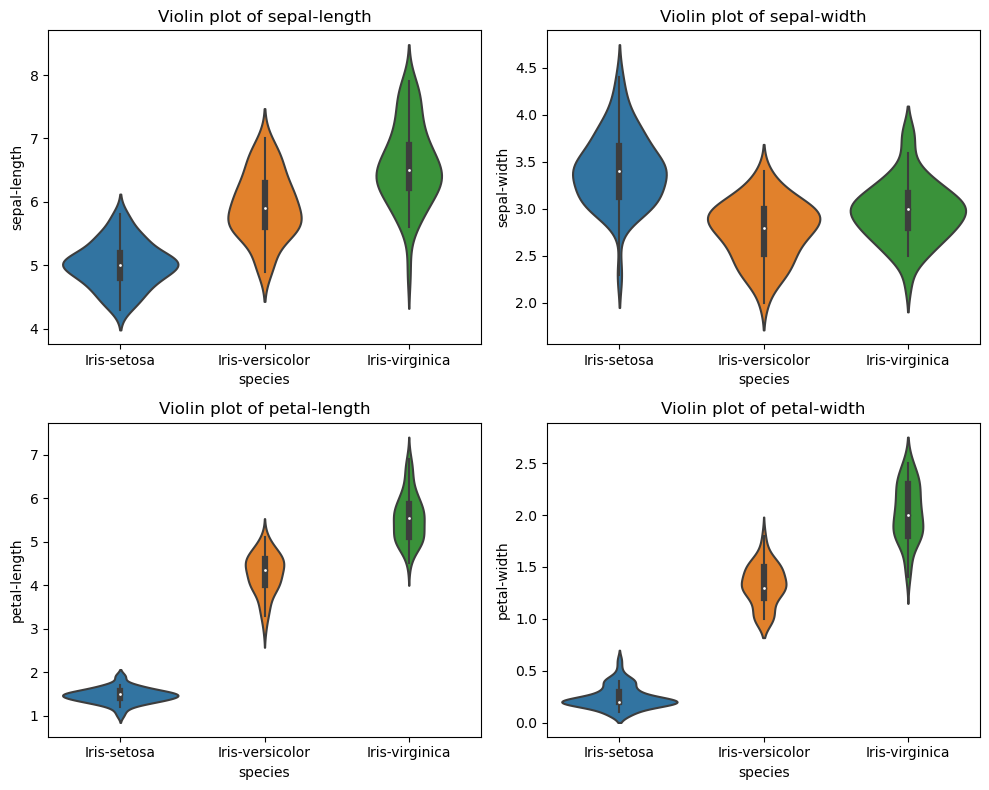

In [10]:
# Violin plots
plt.figure(figsize=(10, 8))

for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='species', y=column, data=df)
    plt.title(f'Violin plot of {column}')

plt.tight_layout()
plt.show()

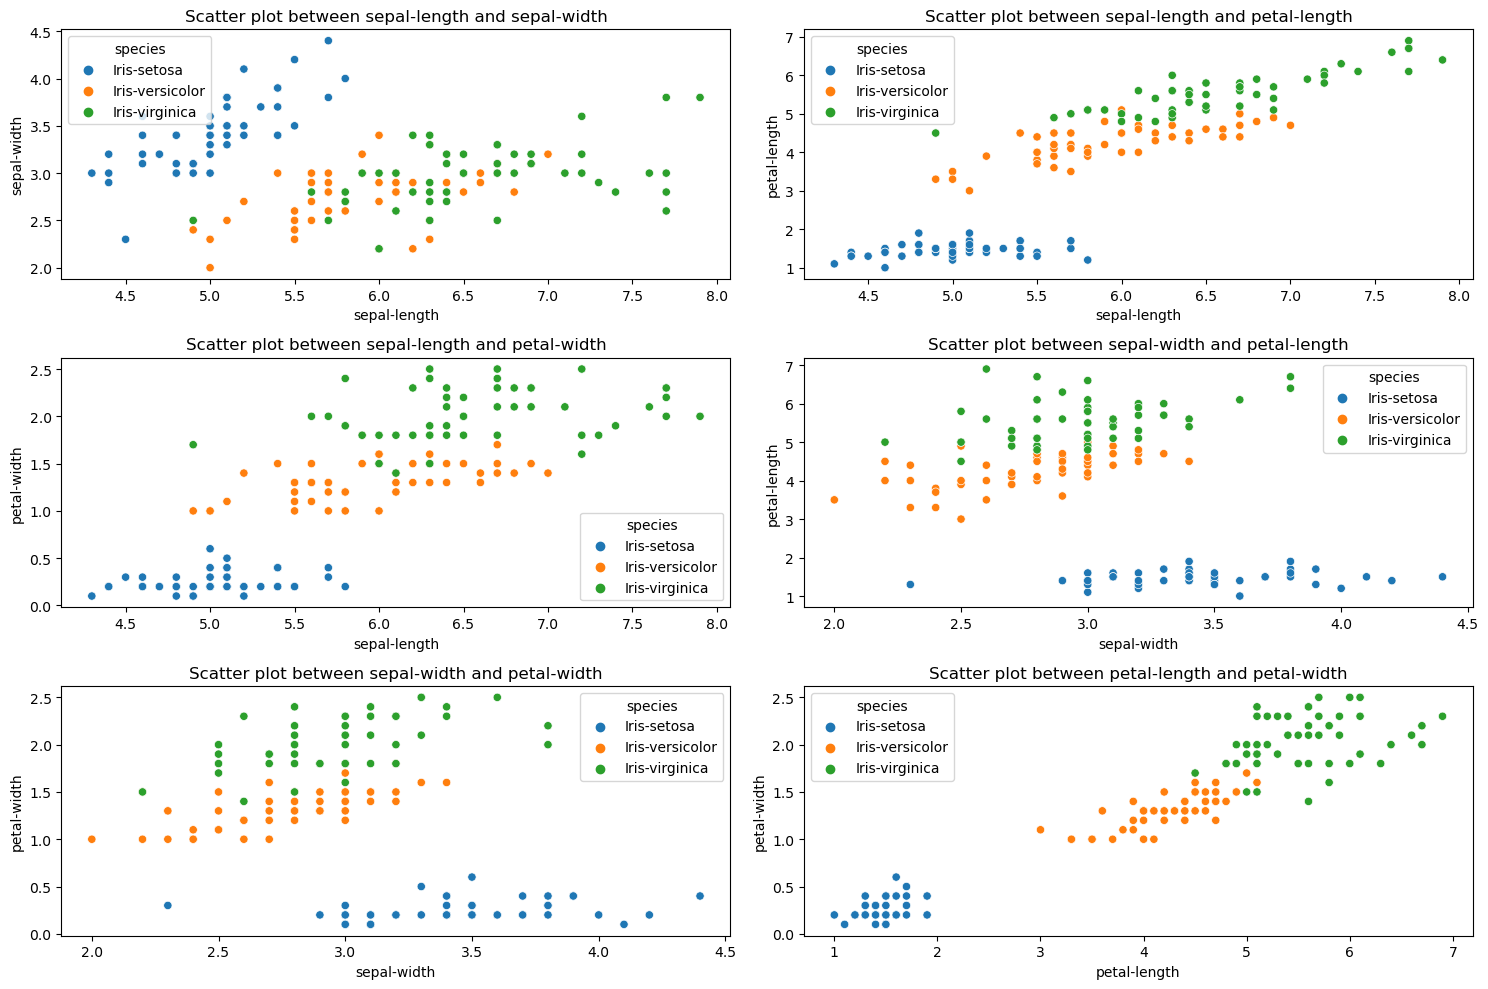

In [11]:
# Scatter plots
plt.figure(figsize=(15, 10))
plot_number = 1  # Start plot number

for i, column1 in enumerate(df.columns[:-1]):
    for j, column2 in enumerate(df.columns[:-1]):
        if i < j:
            plt.subplot(3, 2, plot_number)
            sns.scatterplot(x=column1, y=column2, hue='species', data=df)
            plt.title(f'Scatter plot between {column1} and {column2}')
            plot_number += 1

plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df.drop('species',axis=1)
y=df['species']
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [13]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Train the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
# Make predictions
y_pred = clf.predict(X_test)

In [16]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


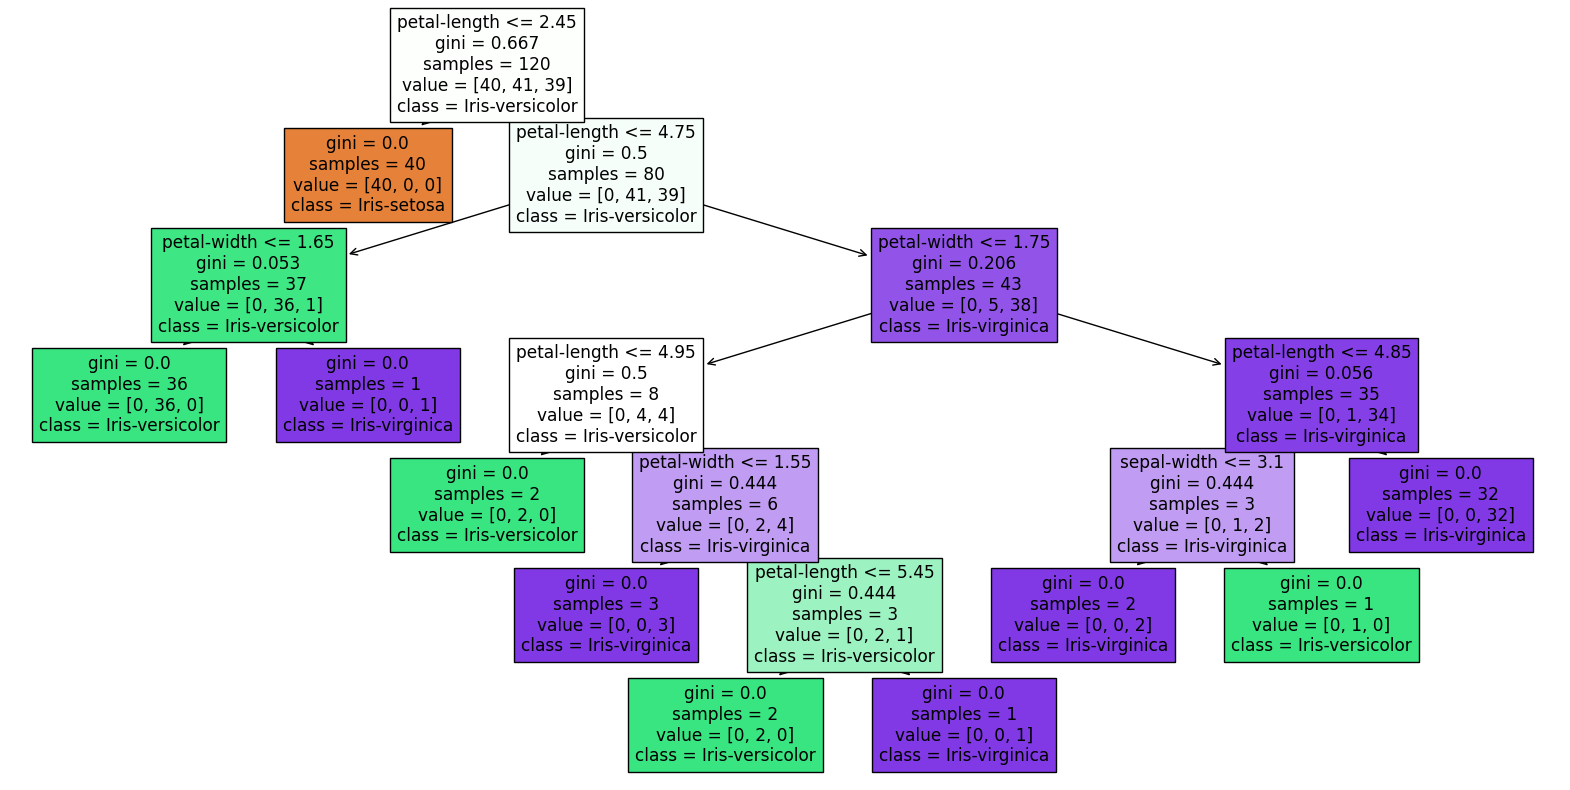

In [17]:
from sklearn.tree import plot_tree
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=le.classes_.tolist(), filled=True)
plt.show()

In [18]:
from sklearn.model_selection import cross_val_score
# Perform 10-fold cross-validation
cross_val_scores = cross_val_score(clf, X, y, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean())

Cross-validation scores: [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]
Mean cross-validation score: 0.9533333333333334
